In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
import numpy as np
import os
from google.colab import drive
import gdown
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Download the file correctly
!gdown --fuzzy -O archive.zip https://drive.google.com/file/d/1cYj63Rq3i7oHySMEni1U0Pu1BuKk1jH8/view?usp=sharing

# Step 2: Unzip the file
!unzip -q archive.zip

Downloading...
From (original): https://drive.google.com/uc?id=1cYj63Rq3i7oHySMEni1U0Pu1BuKk1jH8
From (redirected): https://drive.google.com/uc?id=1cYj63Rq3i7oHySMEni1U0Pu1BuKk1jH8&confirm=t&uuid=82a769c9-463e-4a4d-a160-178e0d6823ad
To: /content/archive.zip
100% 156M/156M [00:02<00:00, 72.9MB/s]


Found 7350 images belonging to 3 classes.
Found 7350 images belonging to 3 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/6


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


230/230 ━━━━━━━━━━━━━━━━━━━━ 124s 466ms/step - accuracy: 0.9120 - loss: 0.2072 - val_accuracy: 0.9883 - val_loss: 0.0276
Epoch 2/6
230/230 ━━━━━━━━━━━━━━━━━━━━ 100s 421ms/step - accuracy: 0.9876 - loss: 0.0361 - val_accuracy: 0.9797 - val_loss: 0.0506
Epoch 3/6
230/230 ━━━━━━━━━━━━━━━━━━━━ 108s 455ms/step - accuracy: 0.9933 - loss: 0.0192 - val_accuracy: 0.9805 - val_loss: 0.0529
Epoch 4/6
230/230 ━━━━━━━━━━━━━━━━━━━━ 143s 459ms/step - accuracy: 0.9947 - loss: 0.0134 - val_accuracy: 0.9861 - val_loss: 0.0332
Epoch 5/6
230/230 ━━━━━━━━━━━━━━━━━━━━ 99s 419ms/step - accuracy: 0.9963 - loss: 0.0118 - val_accuracy: 0.9959 - val_loss: 0.0137
Epoch 6/6
230/230 ━━━━━━━━━━━━━━━━━━━━ 140s 412ms/step - accuracy: 0.9939 - loss: 0.0154 - val_accuracy: 0.9863 - val_loss: 0.0384


Model saved as 'mobilenetv2_plant_disease.h5'


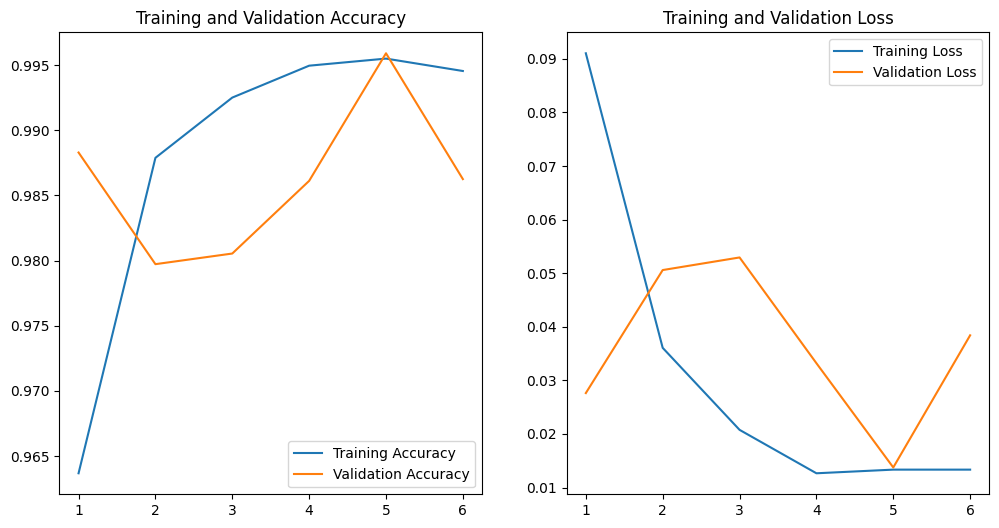

In [ ]:
# Step 6: Define dataset paths for training and validation
train_dir = r"/content/Rose/train"
val_dir = r"/content/Rose/validation"
test_dir = r"/content/Rose/test"

# Step 7: Create data generators
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Step 8: Load MobileNetV2 and train the model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)  # Prevent overfitting
x = Dense(128, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Define the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 9: Train the model and store the history
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=6
)

# Save the trained model
model.save('mobilenetv2_plant_disease.h5')
print("Model saved as 'mobilenetv2_plant_disease.h5'")

# Plot accuracy and loss graphs
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

# Call the function to plot the history
plot_training_history(history)

In [ ]:
# Load the model correctly as .h5
model = tf.keras.models.load_model('/content/mobilenetv2_plant_disease.h5')
print("Model loaded successfully.")


Model loaded successfully.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


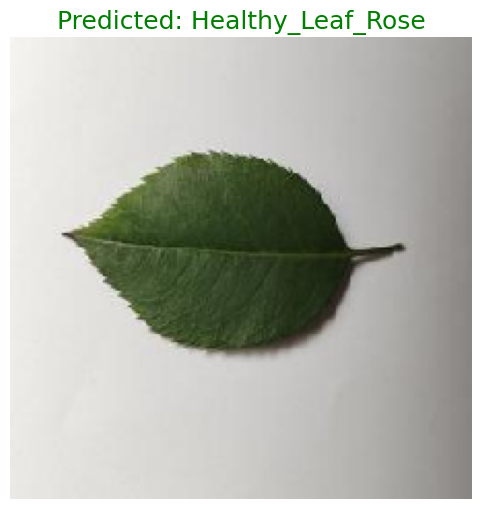

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


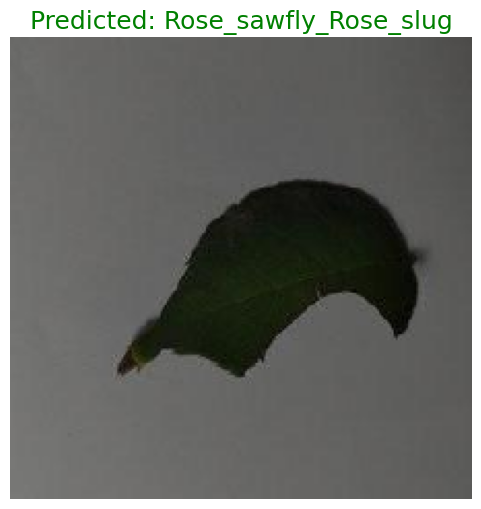

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


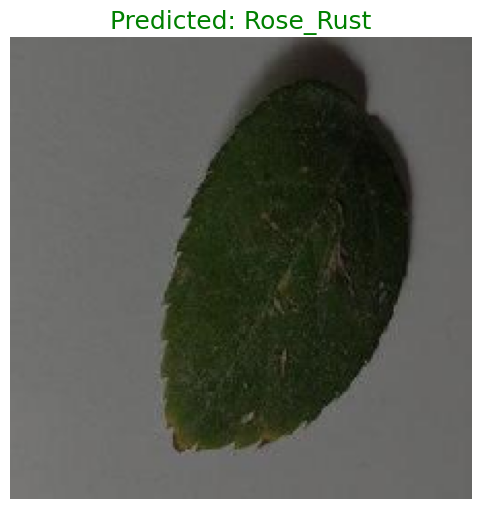

In [ ]:
class_names = sorted(train_generator.class_indices.keys())

# Prediction function that displays the image with its predicted class
def predict_and_display(image_path):
    # Load and preprocess the image
    image = load_img(image_path, target_size=(224, 224))
    image_array = img_to_array(image) / 255.0  # Normalize
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

    # Predict the class
    prediction = model.predict(image_array)
    class_index = np.argmax(prediction, axis=1)[0]
    predicted_class = class_names[class_index]

    # Display the image with the predicted class label
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class}", fontsize=18, color='green')
    plt.show()

# Test the prediction function
test_image_path = r"/content/Rose/test/Healthy_Leaf_Rose/a.jpg"
test_image_path1 = r"/content/Rose/test/Rose_sawfly_Rose_slug/brightened_IMG_20230703_212343.jpg"
test_image_path2 = r"/content/Rose/test/Rose_Rust/brightened_IMG_20230703_213438.jpg"
predict_and_display(test_image_path)
predict_and_display(test_image_path1)
predict_and_display(test_image_path2)
